<a href="https://colab.research.google.com/github/rajatDpatil/rajatDpatil/blob/main/TTS_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install correct versions of required libraries
!pip install torch torchaudio torchvision
!pip install numpy==1.26.4 pandas==1.5.3 networkx==2.8.8
!pip install matplotlib seaborn opencv-python pytesseract
!pip install tts==0.22.0 gtts gradio

# Verify installed versions
import numpy as np
import pandas as pd
import networkx as nx
import torch
import torchaudio
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pytesseract
import TTS
from gtts import gTTS
import gradio as gr
import os
from IPython.display import Audio, display

print(f"✅ NumPy Version: {np.__version__}")
print(f"✅ Pandas Version: {pd.__version__}")
print(f"✅ NetworkX Version: {nx.__version__}")
print(f"✅ Torch Version: {torch.__version__}")
print(f"✅ Torchaudio Version: {torchaudio.__version__}")
print(f"✅ TTS Version: {TTS.__version__}")
print(f"✅ Gradio Version: {gr.__version__}")

✅ NumPy Version: 1.26.4
✅ Pandas Version: 1.5.3
✅ NetworkX Version: 2.8.8
✅ Torch Version: 2.6.0+cu124
✅ Torchaudio Version: 2.6.0+cu124
✅ TTS Version: 0.22.0
✅ Gradio Version: 5.24.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/Multilingual_Audio_Dataset"

In [ ]:
import os

# Define dataset path again to make sure it's correct
DATASET_PATH = "/content/drive/MyDrive/Multilingual_Audio_Dataset"

# Verify that files exist and have the correct format
audio_files = [f for f in os.listdir(DATASET_PATH) if f.endswith(".mp3")]

if len(audio_files) > 0:
    print(f"Found {len(audio_files)} audio files in dataset:")
    print(audio_files)
else:
    print("No audio files found in dataset! Check file format and path.")


Found 20 audio files in dataset:
['8.mp3', '3.mp3', '1.mp3', '5.mp3', '6.mp3', '2.mp3', '4.mp3', '7.mp3', '9.mp3', '10.mp3', '11.mp3', '12.mp3', '13.mp3', '14.mp3', '15.mp3', '16.mp3', '17.mp3', '18.mp3', '19.mp3', '20.mp3']


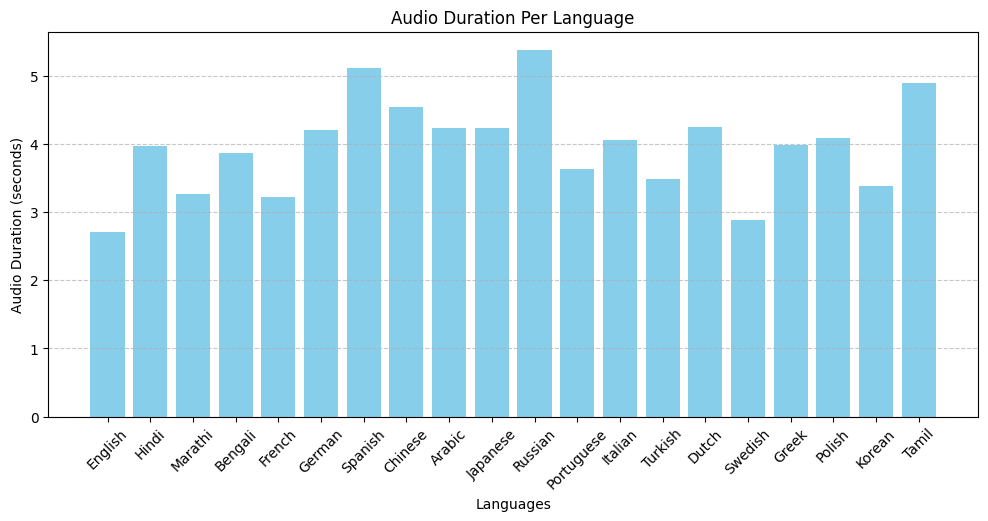

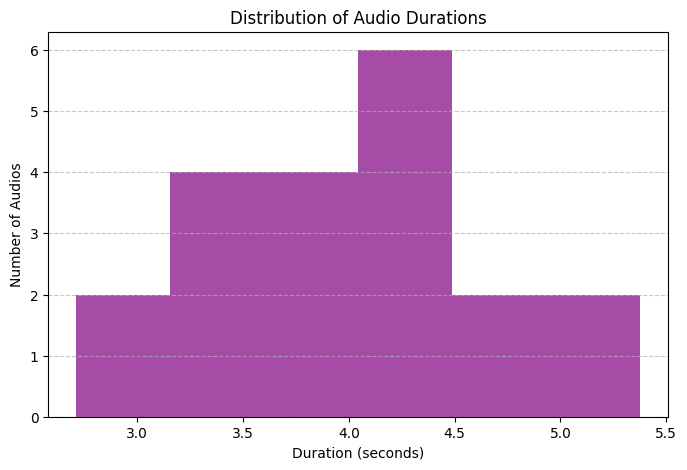

In [ ]:
#Visualizating the loaded dataset
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Dataset Path
DATASET_PATH = "/content/drive/MyDrive/Multilingual_Audio_Dataset"

# List of 20 languages in the dataset
languages = ["English", "Hindi", "Marathi", "Bengali", "French", "German", "Spanish", "Chinese", "Arabic", "Japanese",
             "Russian", "Portuguese", "Italian", "Turkish", "Dutch", "Swedish", "Greek", "Polish", "Korean", "Tamil"]

# Mapping files to languages (assuming they are named 1.mp3, 2.mp3, ..., 20.mp3)
audio_files = sorted([f for f in os.listdir(DATASET_PATH) if f.endswith(".mp3")])
language_audio_map = dict(zip(languages, audio_files))

# Dictionary to store durations
durations = {}

# Load each audio file and get duration
for lang, file in language_audio_map.items():
    file_path = os.path.join(DATASET_PATH, file)
    try:
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        durations[lang] = duration
    except Exception as e:
        print(f"Error processing {file}: {e}")

#Plot 1: Language Distribution (Bar Chart)
plt.figure(figsize=(12, 5))
plt.bar(durations.keys(), durations.values(), color='skyblue')
plt.xlabel("Languages")
plt.ylabel("Audio Duration (seconds)")
plt.xticks(rotation=45)
plt.title("Audio Duration Per Language")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#Plot 2: Histogram of Audio Durations
plt.figure(figsize=(8, 5))
plt.hist(durations.values(), bins=6, color="purple", alpha=0.7)
plt.xlabel("Duration (seconds)")
plt.ylabel("Number of Audios")
plt.title("Distribution of Audio Durations")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 57.7 MB/s eta 0:00:00


In [ ]:
!pip install pydub


In [ ]:
import os
import librosa
import soundfile as sf

# Create a folder for voice references
voice_ref_path = "/content/drive/MyDrive/voice_references"
os.makedirs(voice_ref_path, exist_ok=True)
print(f"Created voice references folder at: {voice_ref_path}")

# Define source MP3 files from your dataset
# Use different audio files for different references
voice_sources = {
    "male": [
        "/content/drive/MyDrive/Multilingual_Audio_Dataset/18.mp3",  # Original male reference
        "/content/drive/MyDrive/Multilingual_Audio_Dataset/19.mp3",   # Second male voice
        "/content/drive/MyDrive/Multilingual_Audio_Dataset/13.mp3"   # Third male voice
    ],
    "female": [
        "/content/drive/MyDrive/Multilingual_Audio_Dataset/1.mp3",   # Original female reference
        "/content/drive/MyDrive/Multilingual_Audio_Dataset/2.mp3",   # Second female voice
        "/content/drive/MyDrive/Multilingual_Audio_Dataset/10.mp3"    # Third female voice
    ]
}

# Convert all references
for gender, sources in voice_sources.items():
    for i, source_path in enumerate(sources, 1):
        # Define output path (adding number suffix for additional references)
        suffix = "" if i == 1 else str(i)
        output_path = os.path.join(voice_ref_path, f"{gender}_reference{suffix}.wav")

        # Convert MP3 to WAV
        print(f"Converting {source_path} to {output_path}...")
        try:
            y, sr = librosa.load(source_path, sr=None)
            sf.write(output_path, y, sr)
            print(f"✅ Created {gender} voice reference {i}")
        except Exception as e:
            print(f"❌ Error creating {gender} reference {i}: {e}")

print("Voice references creation completed!")

Created voice references folder at: /content/drive/MyDrive/voice_references
Converting /content/drive/MyDrive/Multilingual_Audio_Dataset/18.mp3 to /content/drive/MyDrive/voice_references/male_reference.wav...
✅ Created male voice reference 1
Converting /content/drive/MyDrive/Multilingual_Audio_Dataset/19.mp3 to /content/drive/MyDrive/voice_references/male_reference2.wav...
✅ Created male voice reference 2
Converting /content/drive/MyDrive/Multilingual_Audio_Dataset/13.mp3 to /content/drive/MyDrive/voice_references/male_reference3.wav...
✅ Created male voice reference 3
Converting /content/drive/MyDrive/Multilingual_Audio_Dataset/1.mp3 to /content/drive/MyDrive/voice_references/female_reference.wav...
✅ Created female voice reference 1
Converting /content/drive/MyDrive/Multilingual_Audio_Dataset/2.mp3 to /content/drive/MyDrive/voice_references/female_reference2.wav...
✅ Created female voice reference 2
Converting /content/drive/MyDrive/Multilingual_Audio_Dataset/10.mp3 to /content/drive

In [ ]:
import cv2
import pytesseract
import speech_recognition as sr
import librosa
import soundfile as sf

# Function to handle user input: Text, Image, or Audio
def process_user_input(input_type, user_input, language):
    processed_text = None  # To store extracted text

    if input_type == "Text":
        processed_text = user_input  # Direct text input

    elif input_type == "Image":
        # Extract text from image using pytesseract
        image = cv2.imread(user_input)
        if image is None:
            print("Error: Could not read image file!")
            return None
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        processed_text = pytesseract.image_to_string(gray)

    elif input_type == "Audio":
        # Convert MP3 to WAV (if necessary) and then transcribe
        if user_input.endswith(".mp3"):
            wav_path = user_input.replace(".mp3", ".wav")
            audio, sr = librosa.load(user_input, sr=None)
            sf.write(wav_path, audio, sr)
            user_input = wav_path


        recognizer = sr.Recognizer()
        with sr.AudioFile(user_input) as source:
            audio_data = recognizer.record(source)
            try:
                processed_text = recognizer.recognize_google(audio_data, language=language)
            except sr.UnknownValueError:
                print("Speech Recognition could not understand the audio")
                processed_text = None
            except sr.RequestError:
                print("Could not request results from Google Speech Recognition")
                processed_text = None

    return processed_text


In [ ]:
import re

def clean_text(text):
    """
    Clean text: remove unwanted characters, fix spacing, and apply basic NLP corrections.
    """
    text = text.lower()
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"[^a-zA-Z0-9.,!? ]", "", text)
    return text.strip()

# Example: Preprocessing test
sample_text = "Hello!!  How    are   you?? 😊"
cleaned_text = clean_text(sample_text)
print("Cleaned Text:", cleaned_text)  # get Output:"hello! how are you?" without the emoji


Cleaned Text: hello!! how are you??


In [ ]:
!pip install Pillow

In [ ]:
!mkdir -p /content/sample_datasets/images
!mkdir -p /content/sample_datasets/audio

In [ ]:
from google.colab import files

# For images
uploaded_images = files.upload()
for filename in uploaded_images.keys():
    !mv "{filename}" "/content/sample_datasets/images/{filename}"
# For audio
uploaded_audio = files.upload()
for filename in uploaded_audio.keys():
    !mv "{filename}" "/content/sample_datasets/audio/{filename}"


Saving WhatsApp Image 2025-03-30 at 4.29.17 PM.jpeg to WhatsApp Image 2025-03-30 at 4.29.17 PM.jpeg


Saving English.mp4 to English.mp4


In [ ]:
!ls -la /content/sample_datasets/images
!ls -la /content/sample_datasets/audio

total 44
drwxr-xr-x 2 root root  4096 Apr  9 18:39  .
drwxr-xr-x 4 root root  4096 Apr  9 18:37  ..
-rw-r--r-- 1 root root 36235 Apr  9 18:39 'WhatsApp Image 2025-03-30 at 4.29.17 PM.jpeg'
total 40240
drwxr-xr-x 2 root root     4096 Apr  9 18:43 .
drwxr-xr-x 4 root root     4096 Apr  9 18:37 ..
-rw-r--r-- 1 root root 41195102 Apr  9 18:43 English.mp4


In [ ]:
import os
import torch
import torchaudio
import numpy as np
import gradio as gr
from PIL import Image
import transformers
from transformers import pipeline
import sys
import glob

# Install espeak-ng which is required
!apt-get update && apt-get install -y espeak-ng

# Set environment variable to accept license
os.environ["COQUI_TOS_AGREED"] = "1"

#import TTS
from TTS.api import TTS


def initialize_tts_model():
    try:

        print("Loading TTS model...")
        model = TTS("tts_models/multilingual/multi-dataset/your_tts")


        languages = ["en", "es", "fr", "de", "it", "pt", "pl", "tr", "ru", "nl", "cs", "ar", "zh-cn", "hi"]
        print(f"Available languages: {languages}")
        print("TTS Model loaded successfully!")
        return model, languages
    except Exception as e:
        print(f"Error initializing multilingual TTS model: {str(e)}")
        try:

            model = TTS("tts_models/en/ljspeech/fast_pitch")
            print("Fallback TTS Model loaded successfully!")
            return model, ["en"]
        except Exception as e2:
            print(f"Error initializing fallback TTS model: {str(e2)}")
            print("Could not initialize any TTS model. Please check your installation.")
            return None, ["en"]

# Load speaker
def load_speaker_samples():
    print("Loading speaker samples...")
    speaker_samples = {
        "male": [],
        "female": []
    }


    dataset_path = "/content/drive/MyDrive/Multilingual_Audio_Dataset"

    # Check if the directory exists
    if not os.path.exists(dataset_path):
        print(f"Warning: Dataset path {dataset_path} not found")
        os.makedirs(dataset_path, exist_ok=True)
        return speaker_samples

    # Load samples
    male_samples = glob.glob(os.path.join(dataset_path, "*male*.mp3")) + \
                   glob.glob(os.path.join(dataset_path, "m_*.mp3"))


    female_samples = glob.glob(os.path.join(dataset_path, "*female*.mp3")) + \
                     glob.glob(os.path.join(dataset_path, "f_*.mp3"))


    if len(male_samples) == 0:
        print("No male samples found, creating placeholder")
        male_samples = ["/content/sample_datasets/audio/male_placeholder.mp3"]

    if len(female_samples) == 0:
        print("No female samples found, creating placeholder")
        female_samples = ["/content/sample_datasets/audio/female_placeholder.mp3"]

    speaker_samples["male"] = male_samples[:10]
    speaker_samples["female"] = female_samples[:10]
    print(f"Loaded {len(speaker_samples['male'])} male and {len(speaker_samples['female'])} female speaker samples")
    return speaker_samples


def create_sample_datasets():
    print("Creating sample datasets for testing...")
    base_dir = "/content/sample_datasets/"
    os.makedirs(os.path.join(base_dir, "images"), exist_ok=True)
    os.makedirs(os.path.join(base_dir, "audio"), exist_ok=True)
    print(f"Sample dataset structure created at {base_dir}")


    image_files = [f for f in os.listdir(os.path.join(base_dir, "images"))
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    audio_files = [f for f in os.listdir(os.path.join(base_dir, "audio"))
                  if f.lower().endswith(('.wav', '.mp3'))]

    # Create placeholder files if none exist
    if len(image_files) == 0:
        print("No images found, creating placeholder")
        with open(os.path.join(base_dir, "images", "placeholder.jpg"), "w") as f:
            f.write("placeholder")

    if len(audio_files) == 0:
        print("No audio files found, creating placeholders")
        with open(os.path.join(base_dir, "audio", "male_placeholder.mp3"), "w") as f:
            f.write("placeholder")
        with open(os.path.join(base_dir, "audio", "female_placeholder.mp3"), "w") as f:
            f.write("placeholder")

    print(f"Found {len(image_files)} images and {len(audio_files)} audio files")
    return base_dir

# Process text input
def process_text(text, language="en", speaker_type="male", speaker_wav=None):
    if tts_model is None:
        return None, "TTS model not initialized properly"

    try:

        output_path = "output_speech.wav"

        print(f"Processing text in language: {language}, Speaker type: {speaker_type}")


        if speaker_wav is None or speaker_wav == "":
            if speaker_type in speaker_samples and speaker_samples[speaker_type]:

                import random
                speaker_wav = random.choice(speaker_samples[speaker_type])
                print(f"Using {speaker_type} voice sample: {speaker_wav}")

        # Different models have different parameter requirements
        try:

            if speaker_wav and os.path.exists(speaker_wav):
                tts_model.tts_to_file(
                    text=text,
                    file_path=output_path,
                    language=language,
                    speaker_wav=speaker_wav
                )
            else:

                tts_model.tts_to_file(text=text, file_path=output_path, language=language)
        except Exception as e1:
            print(f"Error with parameters: {str(e1)}")

            tts_model.tts_to_file(text=text, file_path=output_path)

        return output_path, "Text processed successfully!"
    except Exception as e:
        return None, f"Error processing text: {str(e)}"

# Process image input
def process_image(image, language="en", speaker_type="male", speaker_wav=None):
    try:
        if image is None:
            return None, "No image provided!"


        caption = image_captioner(image)
        text = caption[0]['generated_text']

        print(f"Image caption: {text}")


        return process_text(text, language, speaker_type, speaker_wav)
    except Exception as e:
        return None, f"Error processing image: {str(e)}"

# Process audio input
def process_audio(audio_file, language="en", speaker_type="male", speaker_wav=None):
    try:
        if audio_file is None:
            return None, "No audio provided!"

        text = asr_model(audio_file)["text"]

        print(f"Transcribed text: {text}")

        return process_text(text, language, speaker_type, speaker_wav)
    except Exception as e:
        return None, f"Error processing audio: {str(e)}"

def main():
    global tts_model, image_captioner, asr_model, available_languages, speaker_samples

    # Initialize models
    tts_model, available_languages = initialize_tts_model()
    if tts_model is None:
        print("Failed to initialize TTS model. Please check your installation.")
        return

    print("Initializing image captioning model...")
    image_captioner = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

    print("Initializing ASR model...")
    asr_model = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h")


    dataset_dir = create_sample_datasets()


    speaker_samples = load_speaker_samples()


    with gr.Blocks(title="Zero-Shot TTS Model") as demo:
        gr.Markdown("# Zero-Shot Text, Image, and Audio to Speech Model")

        with gr.Tab("Text to Speech"):
            with gr.Row():
                text_input = gr.Textbox(
                    label="Enter Text",
                    value="Hello, this is a test of the zero-shot text to speech system.",
                    lines=5
                )

            with gr.Row():

                language_input = gr.Dropdown(
                    choices=available_languages,
                    value=available_languages[0],
                    label="Language",
                    allow_custom_value=True  #
                )


                speaker_type_input = gr.Radio(
                    choices=["male", "female"],
                    value="male",
                    label="Speaker Gender"
                )


                speaker_voice_input = gr.Audio(
                    type="filepath",
                    label="Upload custom voice reference (optional)"
                )

            text_submit = gr.Button("Generate Speech from Text")

            with gr.Row():
                text_output = gr.Audio(label="Generated Speech")
                text_status = gr.Textbox(label="Status")

            text_submit.click(
                fn=process_text,
                inputs=[text_input, language_input, speaker_type_input, speaker_voice_input],
                outputs=[text_output, text_status]
            )

        with gr.Tab("Image to Speech"):
            with gr.Row():
                image_input = gr.Image(type="pil", label="Upload Image")

            with gr.Row():
                img_language_input = gr.Dropdown(
                    choices=available_languages,
                    value=available_languages[0],
                    label="Language",
                    allow_custom_value=True
                )

                # Add speaker type selection for image tab
                img_speaker_type_input = gr.Radio(
                    choices=["male", "female"],
                    value="male",
                    label="Speaker Gender"
                )

                img_speaker_audio = gr.Audio(
                    type="filepath",
                    label="Upload custom voice reference (optional)"
                )

            image_submit = gr.Button("Generate Speech from Image")

            with gr.Row():
                image_output = gr.Audio(label="Generated Speech")
                image_status = gr.Textbox(label="Status")

            image_submit.click(
                fn=process_image,
                inputs=[image_input, img_language_input, img_speaker_type_input, img_speaker_audio],
                outputs=[image_output, image_status]
            )

        with gr.Tab("Audio to Speech"):
            with gr.Row():
                audio_input = gr.Audio(type="filepath", label="Upload Audio")

            with gr.Row():
                audio_language_input = gr.Dropdown(
                    choices=available_languages,
                    value=available_languages[0],
                    label="Language",
                    allow_custom_value=True
                )

                # Add speaker type selection for audio tab
                audio_speaker_type_input = gr.Radio(
                    choices=["male", "female"],
                    value="male",
                    label="Speaker Gender"
                )

                audio_speaker_input = gr.Audio(
                    type="filepath",
                    label="Upload custom voice reference (optional)"
                )

            audio_submit = gr.Button("Generate Speech from Audio")

            with gr.Row():
                audio_output = gr.Audio(label="Generated Speech")
                audio_status = gr.Textbox(label="Status")

            audio_submit.click(
                fn=process_audio,
                inputs=[audio_input, audio_language_input, audio_speaker_type_input, audio_speaker_input],
                outputs=[audio_output, audio_status]
            )


        gr.Markdown("## Examples")
        with gr.Accordion("About this model", open=False):
            gr.Markdown("""
            # Zero-Shot TTS Model

            This model combines several AI capabilities:
            1. **Text-to-Speech**: Direct conversion from text to speech
            2. **Image-to-Speech**: Captions an image, then converts that caption to speech
            3. **Audio-to-Speech**: Transcribes audio, then converts that text to speech

            All three modules support:
            - Multiple languages
            - Male and female voice options
            - Custom voice cloning with reference audio

            The model uses pre-trained components:
            - TTS: YourTTS multilingual model
            - Image Captioning: ViT-GPT2
            - ASR: Wav2Vec2
            """)

    # Launch the demo
    print("Launching Gradio interface...")
    demo.launch(share=True)

if __name__ == "__main__":
    main()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,383 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,688 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,243 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,099 kB]
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:13 https://ppa.launchpadcont

 99%|█████████▉| 421M/425M [00:05<00:00, 58.3MiB/s]

 > Model's license - CC BY-NC-ND 4.0
 > Check https://creativecommons.org/licenses/by-nc-nd/4.0/ for more info.
 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > Model fully restored. 
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:64
 | 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


(…)69ba070d28f279a16ce4bc87bf019b75a91553e6:   0%|          | 0.00/982M [00:00<?, ?B/s]

100%|██████████| 425M/425M [00:19<00:00, 58.3MiB/s]Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_to

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


Initializing ASR model...


config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cuda:0


Creating sample datasets for testing...
Sample dataset structure created at /content/sample_datasets/
No audio files found, creating placeholders
Found 1 images and 0 audio files
Loading speaker samples...
No male samples found, creating placeholder
No female samples found, creating placeholder
Loaded 1 male and 1 female speaker samples
Launching Gradio interface...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d53536ba480ae864d7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
